# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [2]:
scores_train=pd.read_csv('data_train_scores_added.csv')
scores_test=pd.read_csv('data_test_scores_added.csv')

In [5]:
lda_train=pd.read_csv('train_lda.csv')
lda_test=pd.read_csv('test_lda.csv')

In [8]:
sentiment_train=pd.read_csv("sentiment_train.csv", sep='*')
sentiment_test=pd.read_csv("sentiment_test.csv", sep='*')

In [43]:
lstm_train=pd.read_csv("submission_train.csv", sep=',')
lstm_test=pd.read_csv("submission_test.csv", sep=',')

lstm_train=lstm_train.rename(columns={"target": "lstm"})
lstm_test=lstm_test.rename(columns={"target": "lstm"})

# Jointure des colonnes

In [47]:
df1=lda_train[['id','topic1','topic2','topic3']].join(scores_train[['Score_Sentence']]).join(sentiment_train[['sentiment_rate']]).join(lstm_train[['lstm']])
df2=lda_test[['id','topic1','topic2','topic3']].join(scores_test[['Score_Sentence']]).join(sentiment_test[['sentiment_rate']]).join(lstm_train[['lstm']])

In [55]:
df1.to_csv('concat_train.csv',header=False)
df2.to_csv('concat_test.csv',header=False)

# Concaténation pour PCA

In [49]:
df=pd.concat([df1,df2])
df=df.reset_index(drop=True)

# PCA

[0.26177247 0.24194613 0.21921969]


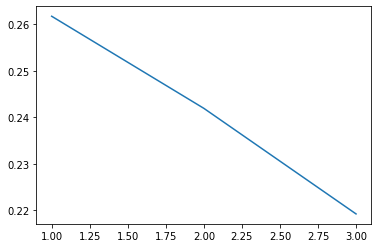

In [50]:
features=['topic1',
       'topic2', 'topic3', 'Score_Sentence', 'sentiment_rate', 'lstm' ]

df0=df[features]

x = df0.loc[:, features].values
#y = df.loc[['Name'],:].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = principalDf.join( df['id'])
pcs=pca.components_
plt.plot(np.linspace(1,3, 3), pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)

In [51]:
finalDf

,principal component 1,principal component 2,principal component 3,id
0,-1.012723,0.323278,-1.365902,1
1,0.848423,0.382995,-1.739225,4
2,-1.773796,-1.563027,0.506453,5
3,0.625566,0.251805,-1.707762,6
4,-0.559882,-1.558194,-0.635680,7
...,...,...,...,...
10871,-1.238530,-1.564830,-1.017092,10861
10872,-0.704883,-0.441419,1.281684,10865
10873,1.289868,-0.294006,-0.015096,10868
10874,-1.493633,-1.374315,0.110382,10874


Text(0, 0.5, 'PC2')

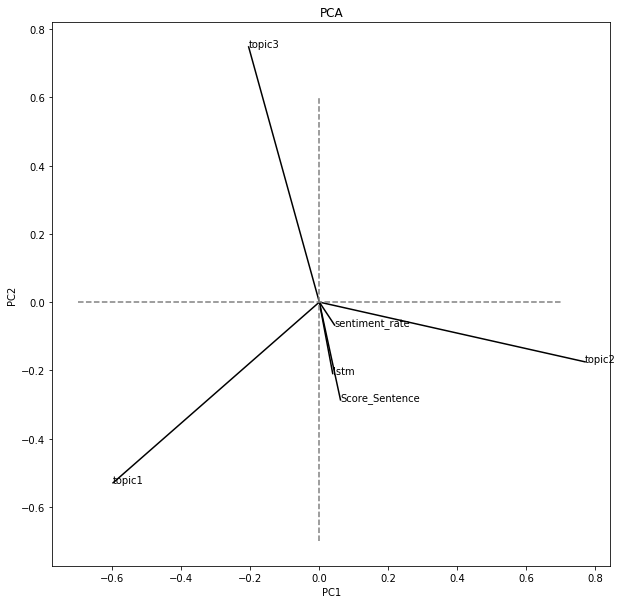

In [52]:
plt.figure(figsize=(10,10)),
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    # Display month name
    plt.text(x, y, features[i], fontsize='10')

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

plt.plot([0, 0], [-0.7, 0.6], color='grey', ls='--')
plt.title('PCA')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC3')

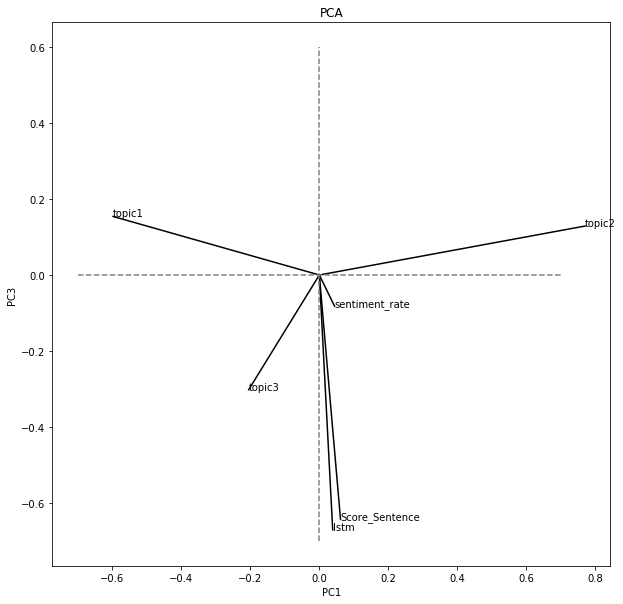

In [53]:
plt.figure(figsize=(10,10)),
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[2, :])):
    plt.plot([0, x], [0, y], color='k')
    # Display month name
    plt.text(x, y, features[i], fontsize='10')

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

plt.plot([0, 0], [-0.7, 0.6], color='grey', ls='--')
plt.title('PCA')
plt.xlabel("PC1")
plt.ylabel("PC3")

Text(0, 0.5, 'PC3')

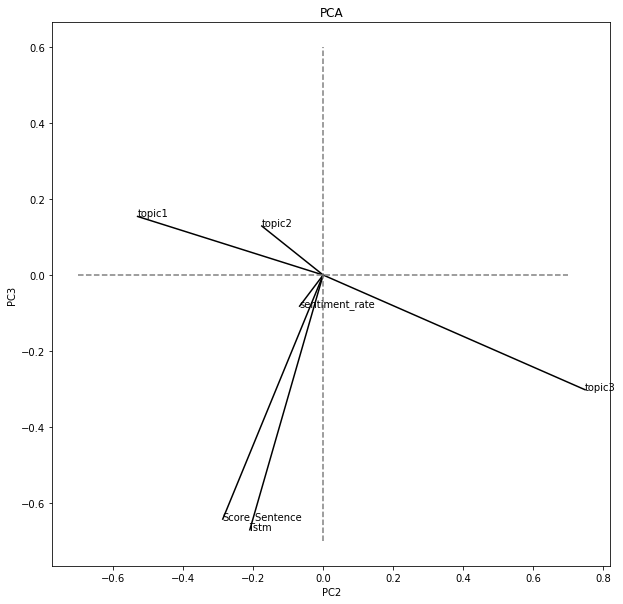

In [54]:
plt.figure(figsize=(10,10)),
for i, (x, y) in enumerate(zip(pcs[1, :], pcs[2, :])):
    plt.plot([0, x], [0, y], color='k')
    # Display month name
    plt.text(x, y, features[i], fontsize='10')

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

plt.plot([0, 0], [-0.7, 0.6], color='grey', ls='--')
plt.title('PCA')
plt.xlabel("PC2")
plt.ylabel("PC3")

In [ ]:
plt.scatter(df['Score_Sentence'],df['sentiment_rate'])
plt.xlabel('Score Sentence')
plt.ylabel('Sentiment Rate')
plt.show()